# Decision Tree-2

You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
    
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

### Import the dataset and examine the variables. Use descriptive statistics and visualizations to understand the distribution and relationships between the variables.

In [84]:
# Importing Necessary lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('diabetes.csv')

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [90]:
# Checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

#### Observation: There is no missing values in any features. We have total of 768 records and 9 columns.

## Check Descriptive Stats

---

In [91]:
df.describe().astype(int)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768,768,768,768,768,768,768,768,768
mean,3,120,69,20,79,31,0,33,0
std,3,31,19,15,115,7,0,11,0
min,0,0,0,0,0,0,0,21,0
25%,1,99,62,0,0,27,0,24,0
50%,3,117,72,23,30,32,0,29,0
75%,6,140,80,32,127,36,0,41,1
max,17,199,122,99,846,67,2,81,1


#### Observation: Some features like 'Gluscose','BloodPressure', 'SkinThickness', 'Insulin' and 'BMI' have min value as 0. In practicality we can't have any of such feature to have value zero. This values should be replaced with imputed ones.

In [92]:
df['Outcome'].value_counts(normalize = True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

### Observation: It shows the number of diabetic results are less than non_diabetic results hence; its an imbalanced feature.

## Lets check the distribution of each feature with pairplot

---

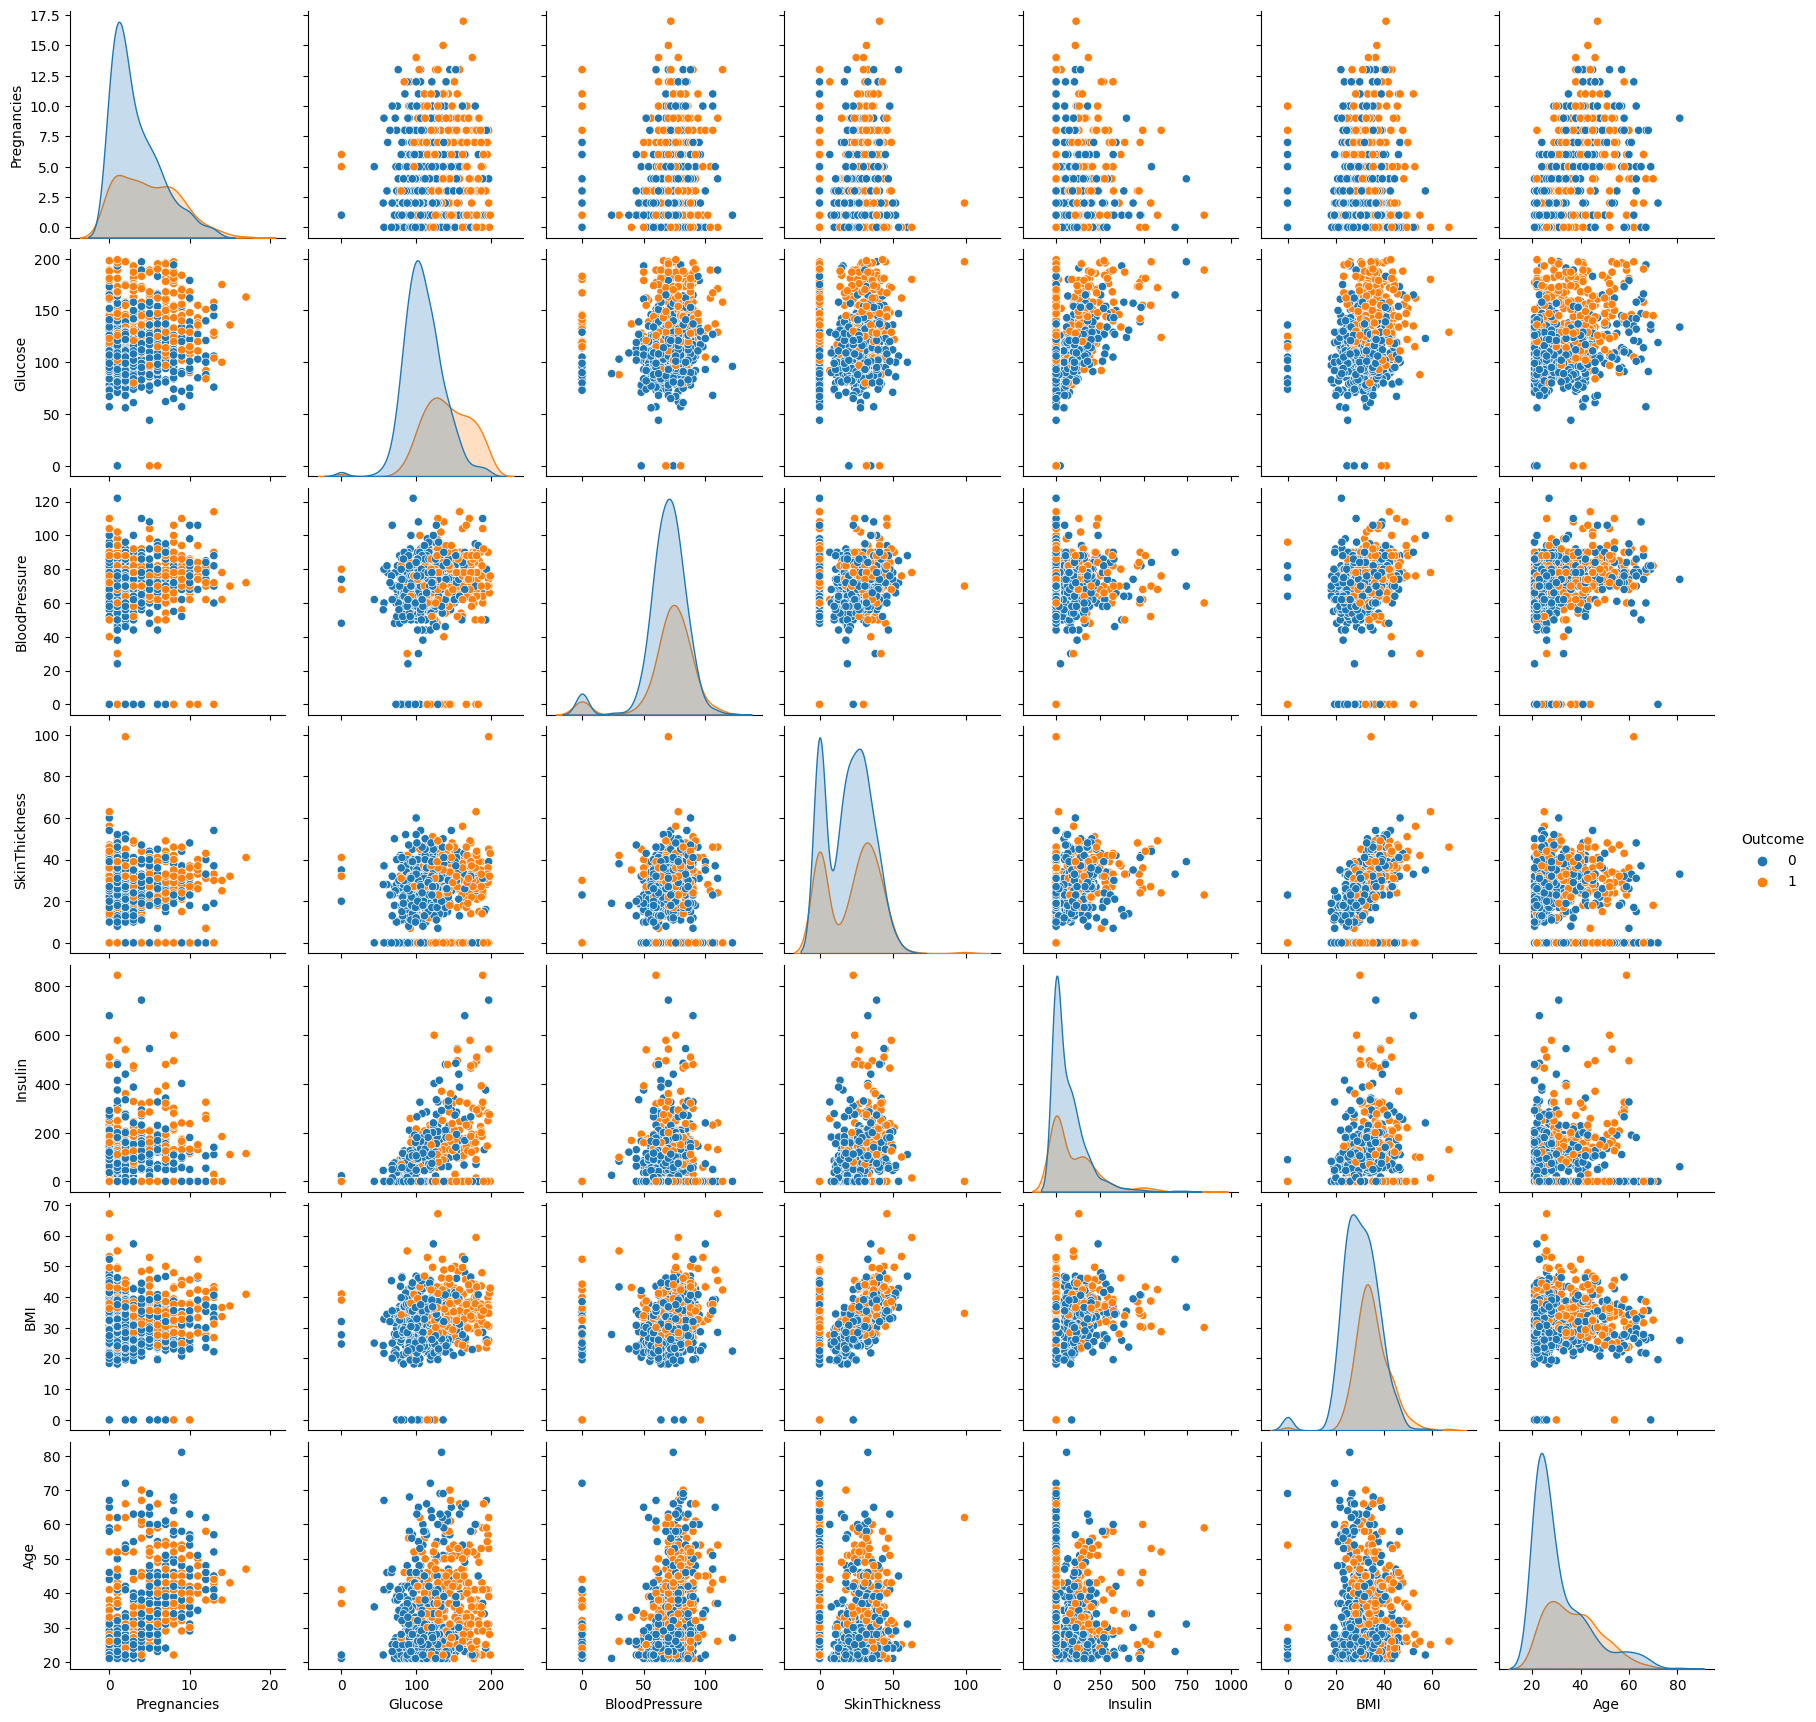

In [9]:
sns.pairplot(df, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI','Age'],hue = 'Outcome')
plt.show()

#### Observation:
1. Few features are under normal distributions: Glucose, BloodPressure, SkinThickness and BMI
2. Features with Right skewed distributions: Pregnancies, Insulin, Age

## Lets check box plot to check outliers:


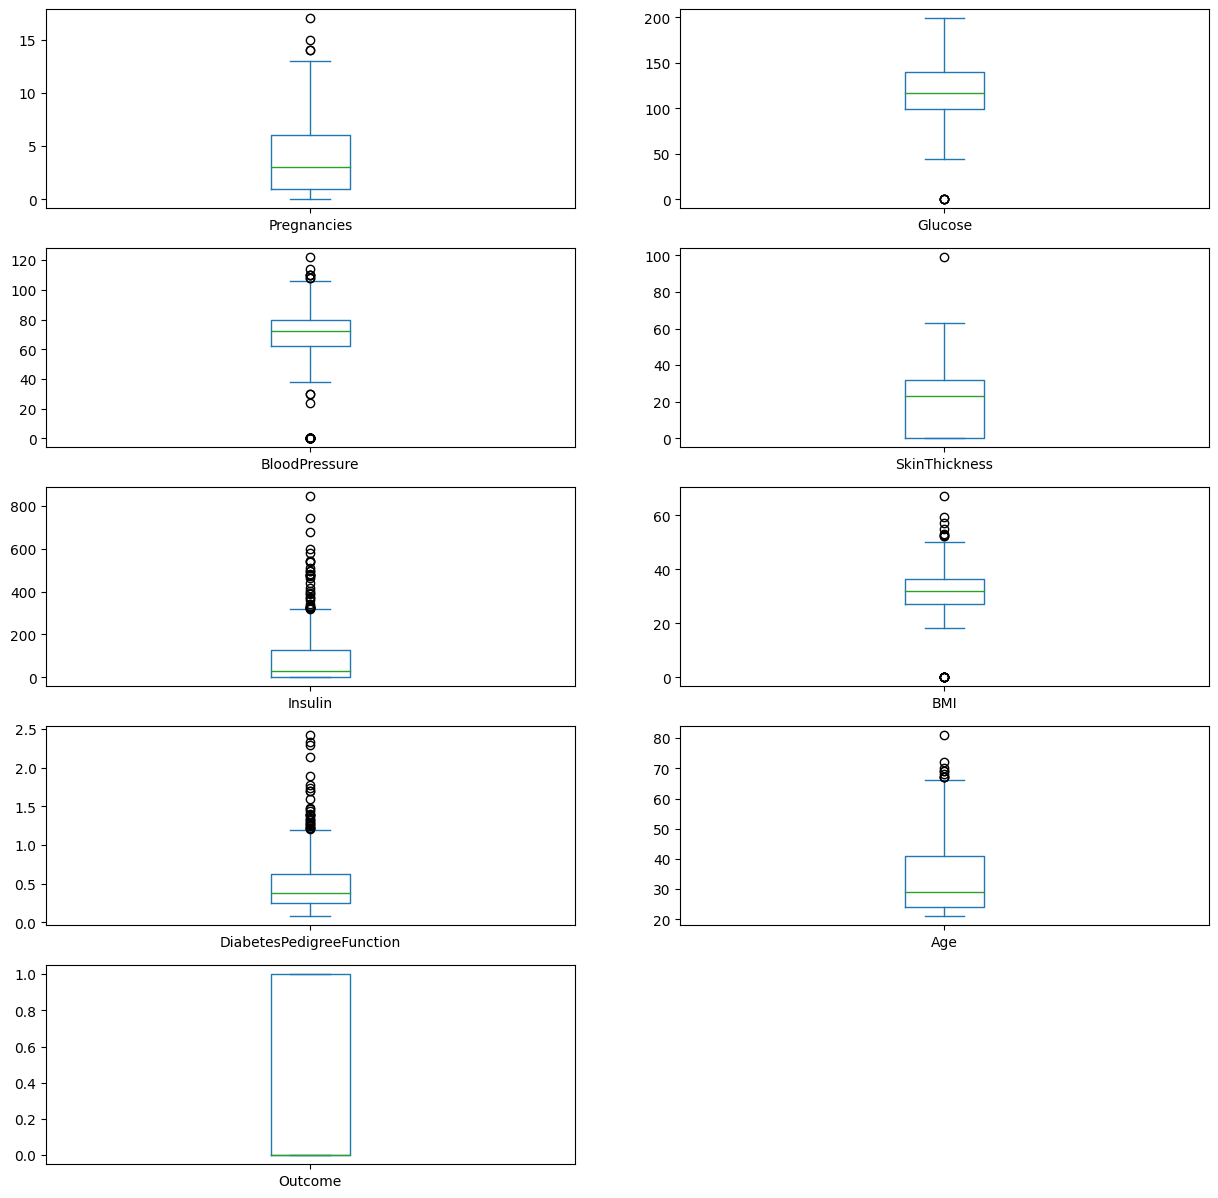

In [10]:
df.plot(kind="box",subplots=True,layout=(5,2),figsize=(15,15))
plt.show()

#### Observation: Few features like Pregnancies, Insulin, BloodPressure, BMI , DiabetesPedigreeFunction, Age have outliers.

## Applying Exploratory Data Analysis:

---

### To begin with analysis firstly we had to remove the '0' values from 'Gluscose','BloodPressure', 'SkinThickness', 'Insulin', 'BMI' and replace it with Nan for further imputations

In [93]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)

In [94]:
# Finding min value again:

for col in df.columns:
    print("The minimum value fore the columns {} is {}".format(col, df[col].min()))

The minimum value fore the columns Pregnancies is 0
The minimum value fore the columns Glucose is 44.0
The minimum value fore the columns BloodPressure is 24.0
The minimum value fore the columns SkinThickness is 7.0
The minimum value fore the columns Insulin is 14.0
The minimum value fore the columns BMI is 18.2
The minimum value fore the columns DiabetesPedigreeFunction is 0.078
The minimum value fore the columns Age is 21
The minimum value fore the columns Outcome is 0


### Calculating Skewness in data:

---



In [13]:
from scipy.stats import skew
for col in df.drop('Outcome', axis = 1).columns:
    print("Skewness for the column {} is {}".format(col, df[col].skew()))

Skewness for the column Pregnancies is 0.9016739791518588
Skewness for the column Glucose is 0.5309885349396285
Skewness for the column BloodPressure is 0.13415273171959252
Skewness for the column SkinThickness is 0.690619013984192
Skewness for the column Insulin is 2.166463843812443
Skewness for the column BMI is 0.5939697505712673
Skewness for the column DiabetesPedigreeFunction is 1.919911066307204
Skewness for the column Age is 1.1295967011444805


### Observation: As per skewness data 'Insulin' and 'DiabetesPedigreeFunction' is highly exposed to outliers.

In [95]:
# Filling null values with the median to the skewed features.
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].median())

In [96]:
# Filling null values with the mean to the normally distributed features.
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']:
    df[col] = df[col].fillna(df[col].mean())

In [97]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,125.0,30.1,0.349,47,1


## Lets check how the avg measure of each feature varies with respect to diabetic and non daibateic patients:

---

In [18]:
# Defining a function which calculates mean of each feature based on diabetic and non_diabetic
diabetic = df[df['Outcome']==1]
non_diabetic = df[df['Outcome']==0]

def avg_outcome(col):
    x = diabetic[col].mean()
    y = non_diabetic[col].mean()
    print ('Mean Value of {} for diabetic is: {:.2f}'.format(col, x))
    print ('Mean Value of {} for non_diabetic is: {:.2f}'.format(col, y))
    print ('__________________________________________')

In [19]:
avg_outcome('Pregnancies')
avg_outcome('Insulin')
avg_outcome('Glucose')
avg_outcome('BloodPressure')
avg_outcome('Age')

Mean Value of Pregnancies for diabetic is: 4.87
Mean Value of Pregnancies for non_diabetic is: 3.30
__________________________________________
Mean Value of Insulin for diabetic is: 164.70
Mean Value of Insulin for non_diabetic is: 127.79
__________________________________________
Mean Value of Glucose for diabetic is: 142.17
Mean Value of Glucose for non_diabetic is: 110.71
__________________________________________
Mean Value of BloodPressure for diabetic is: 75.15
Mean Value of BloodPressure for non_diabetic is: 70.94
__________________________________________
Mean Value of Age for diabetic is: 37.07
Mean Value of Age for non_diabetic is: 31.19
__________________________________________


## Observation:
1. People with high number of pregnancy tend to have diabeties compare to people with less number of pregnancy.
2. Diabetic People tend to have more Insulin level.
3. The blood pressure is greater for diabetic people as compared to the non-diabetic people
4. Diabetic People tend to have much higher Glucose level
5. Diabetic people tend to be more Aged than compare to non-diabetic people

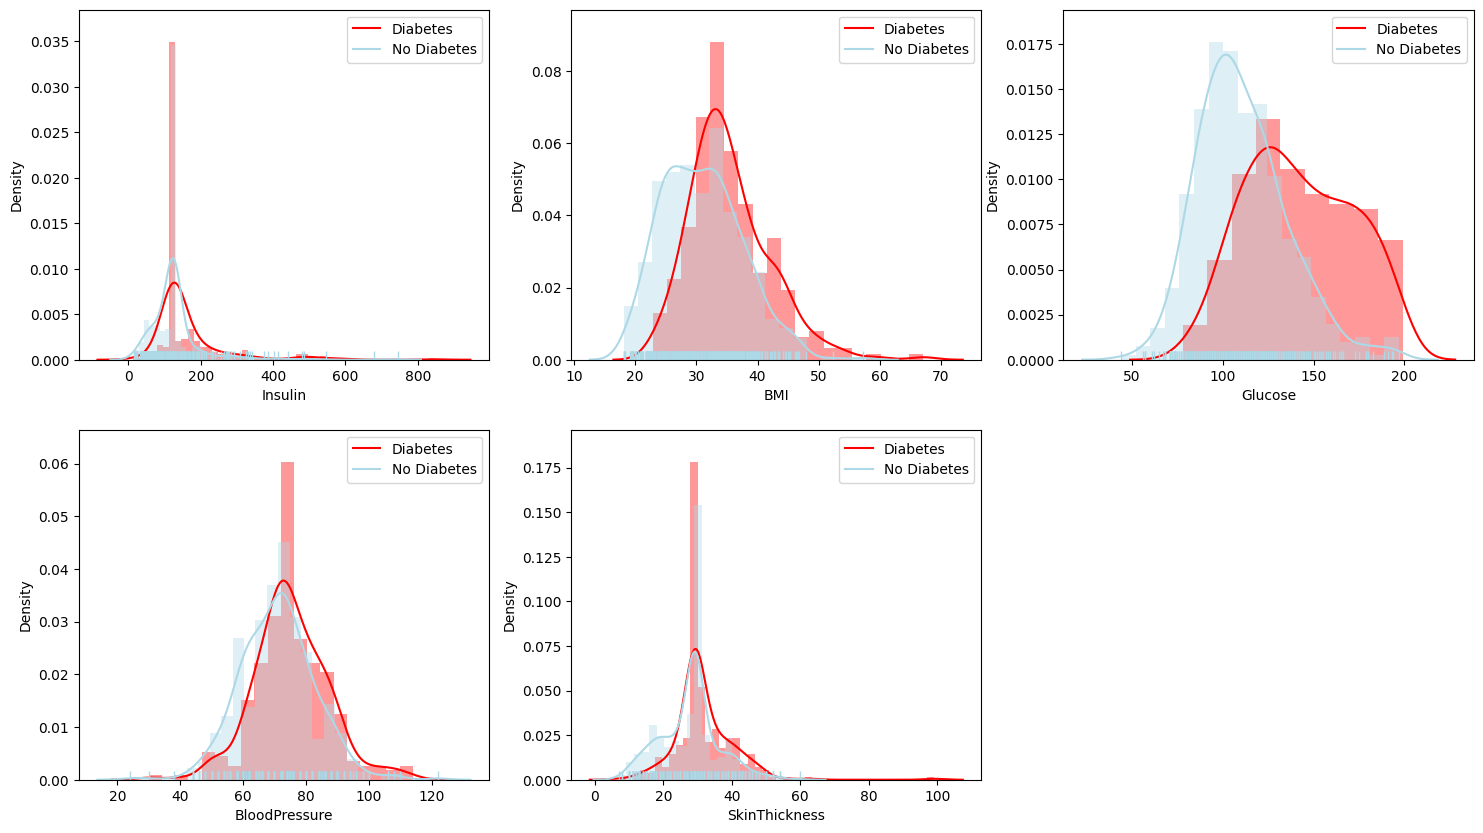

In [22]:
## Lets visualize the same via distplot:

plt.figure(figsize = (18,10))
plt.subplot(231), sns.distplot(df['Insulin'][df.Outcome == 1], color ="red", rug = False), sns.distplot(df['Insulin'][df.Outcome == 0], color ="lightblue",rug = True)
plt.legend(['Diabetes', 'No Diabetes'])
plt.subplot(232), sns.distplot(df['BMI'][df.Outcome == 1], color ="red", rug = False), sns.distplot(df['BMI'][df.Outcome == 0], color ="lightblue",rug = True)
plt.legend(['Diabetes', 'No Diabetes'])
plt.subplot(233), sns.distplot(df['Glucose'][df.Outcome == 1], color ="red", rug = False), sns.distplot(df['Glucose'][df.Outcome == 0], color ="lightblue",rug = True)
plt.legend(['Diabetes', 'No Diabetes'])
plt.subplot(234), sns.distplot(df['BloodPressure'][df.Outcome == 1], color ="red", rug = False), sns.distplot(df['BloodPressure'][df.Outcome == 0], color ="lightblue",rug = True)
plt.legend(['Diabetes', 'No Diabetes'])
plt.subplot(235), sns.distplot(df['SkinThickness'][df.Outcome == 1], color ="red", rug = False), sns.distplot(df['SkinThickness'][df.Outcome == 0], color ="lightblue",rug = True)
plt.legend(['Diabetes', 'No Diabetes'])

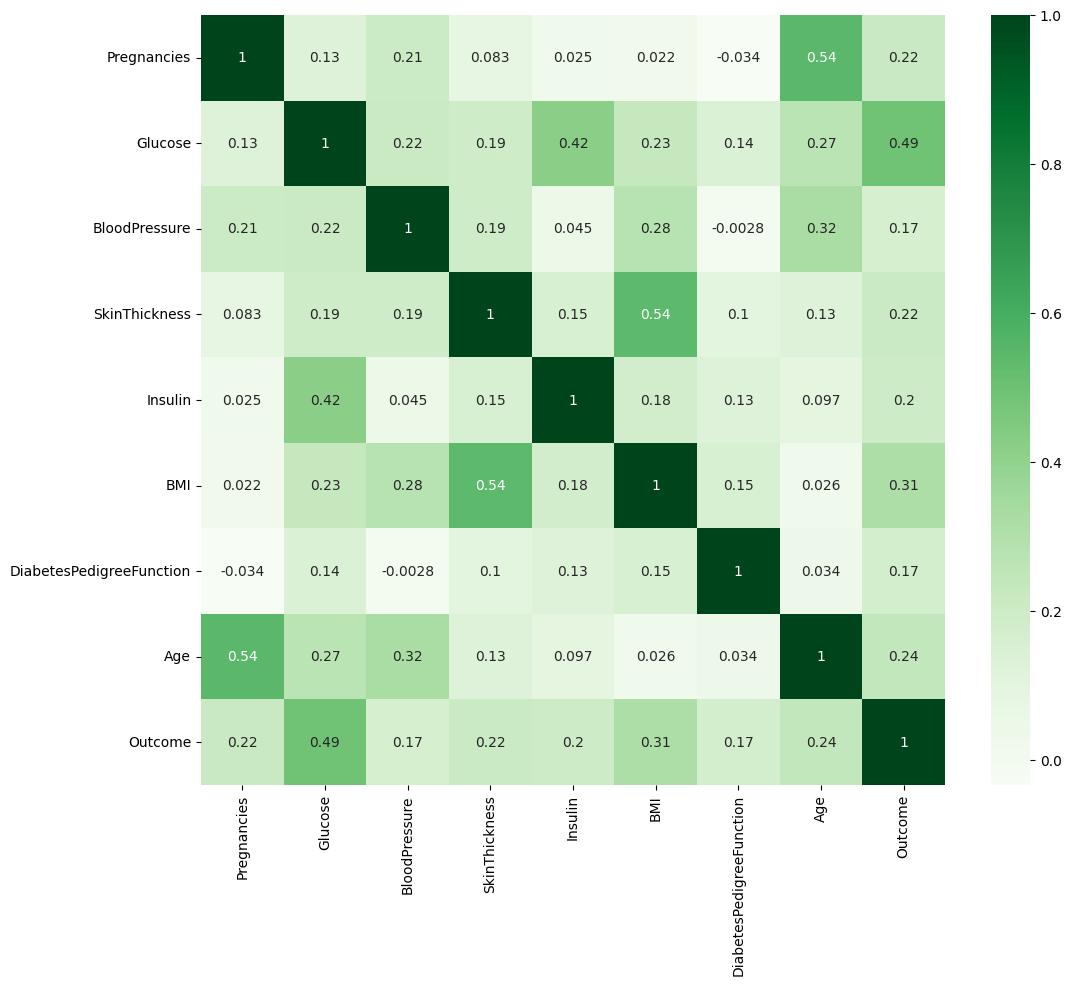

In [26]:
# Lets visualize correlation among each features via heatmap:

plt.figure(figsize=(12,10))

p = sns.heatmap(df.corr(), annot=True,cmap ="Greens")

### Observation: From the above heatmap, we can observe that all the features are weakly correlated, so that it removes multicollinearity out of equation.

## Model Building:

---

## Splitting Test and Train Data:

In [98]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Outcome'])
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape

((576, 8), (192, 8))

## Standardizing the data and creating pickle file:

In [35]:
import pickle
from sklearn.preprocessing import StandardScaler

##standard Scaling- Standardization
def scaler_standard(X_train, X_test):
    #scaling the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #saving the model
    file = open('/content/Pickle/standardScalar.pkl','wb')
    pickle.dump(scaler,file)
    file.close()

    return X_train_scaled, X_test_scaled

In [99]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [100]:
X_train_scaled

array([[ 2.80346794,  0.24235989,  0.01112665, ...,  1.10297267,
         0.29608546,  0.96352088],
       [ 0.07832678,  0.24235989,  1.13577091, ...,  0.40453235,
        -0.70087555, -0.86295593],
       [-0.22446668, -2.02020774,  0.80486705, ...,  0.30267647,
        -0.66548048,  1.13747105],
       ...,
       [ 1.89508755, -0.6892856 ,  1.13577091, ...,  1.93237054,
         1.96850229,  0.44167036],
       [-1.13284707,  0.64163653,  0.01112665, ...,  1.46674367,
        -0.77756486, -0.34110542],
       [-1.13284707,  0.10926768,  1.96303057, ..., -1.42887348,
        -0.6094383 , -1.03690611]])

In [41]:
X_test_scaled

array([[ 0.6839137 , -0.78910477, -1.18055612, ...,  0.24447311,
        -0.11390738,  0.87654579],
       [-0.52726014, -0.32328202,  0.22578529, ...,  0.49183739,
        -0.94569142, -1.03690611],
       [-0.52726014, -0.45637423, -0.68420033, ..., -0.22115377,
        -0.91619553, -1.03690611],
       ...,
       [ 0.6839137 ,  0.04272157, -0.0223926 , ...,  0.18626975,
         0.77981801,  0.09377001],
       [-0.22446668, -1.45456583, -1.84236384, ..., -0.19205209,
        -0.65073254, -0.60203068],
       [-0.22446668, -0.52292034, -0.0223926 , ..., -0.94869576,
        -0.77166568, -0.51505559]])

In [101]:
# Using Decision Tree Classifier Algorithm:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()

In [102]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [103]:
y_pred = classifier.predict(X_test)

In [104]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [105]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_test,y_pred)
print('Accuarcy is:', score)
print(classification_report(y_test,y_pred))

Accuarcy is: 0.6770833333333334
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       123
           1       0.54      0.65      0.59        69

    accuracy                           0.68       192
   macro avg       0.66      0.67      0.66       192
weighted avg       0.69      0.68      0.68       192



### Without hyperparameter tuning we got the accuracy as 0.67

## Lets do hyper parameter tunning for best accuracy:

---

In [64]:
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']
}

In [65]:
from sklearn.model_selection import GridSearchCV
classifier=DecisionTreeClassifier()
clf_cv=GridSearchCV(classifier,param_grid=parameter,cv=5,scoring='accuracy')

In [66]:
clf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [67]:
clf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [76]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion='log_loss', max_depth = 4, max_features = 'log2', splitter = 'best')

In [77]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, max_features='log2')

In [78]:
y_best_pred=clf.predict(X_test)

In [80]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score=accuracy_score(y_best_pred,y_test)
print(confusion_matrix(y_test, y_best_pred))
print(score)
print(classification_report(y_test,y_best_pred))

[[117   6]
 [ 46  23]]
0.7291666666666666
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       123
           1       0.79      0.33      0.47        69

    accuracy                           0.73       192
   macro avg       0.76      0.64      0.64       192
weighted avg       0.74      0.73      0.69       192



## With Hyperparameter tunning we achieved the improved accuracy of 0.72

In [83]:
import pickle
file = open('/content/Pickle/model_for_pred.pkl','wb')
pickle.dump(clf,file)
file.close()

## Split Diagram:

---

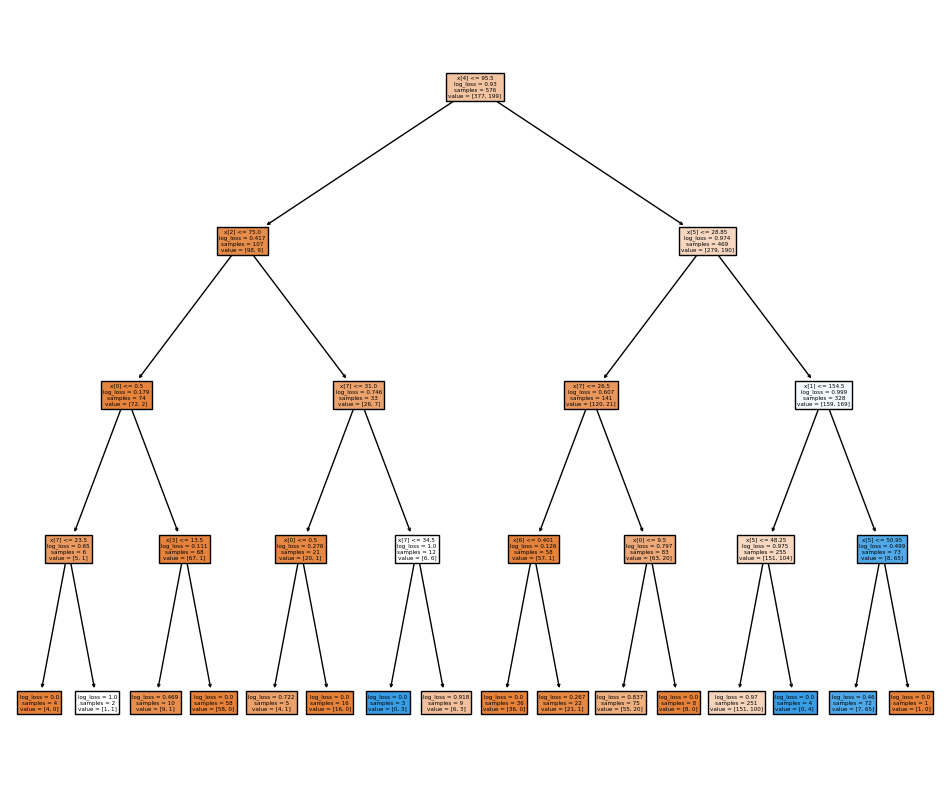

In [107]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(clf,filled=True)
plt.show()

# Conclusion: We have created an ML model which is trained and tested for the diabeties dataset. This dataset is preprocessed, performed EDA, permorfed Model Building and HyperParameter tuning. The final accuracy we achieve is 0.72.

# We can improve this accuracy when the outliers are treated carefully, when the data is balanced (i.e. same number of diabteic and non_databteic results.)